<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/artigo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Instalar a biblioteca gnews
!pip install gnews

# GNews
from gnews import GNews

# Configurar o cliente do GNews
google_news = GNews(language='pt', country='BR', max_results=25)

# Buscar notícias sobre 'Bolsa'
noticias = google_news.get_news('Ibovespa')

# Extrair os títulos das notícias
frases_Ibovespa = [noticia['title'] for noticia in noticias]

# Exibir as manchetes coletadas
for i, frase in enumerate(frases_Ibovespa, 1):
    print(f"{i}. {frase}")

# Nota: As células subsequentes para análise de sentimento e visualização também precisarão
# das suas respectivas bibliotecas instaladas (transformers e matplotlib/collections).
# Certifique-se de que elas também estejam instaladas se você ainda não o fez.
# Exemplo para transformers: !pip install transformers
# Exemplo para matplotlib: !pip install matplotlib

1. Por que junho pode ser um mês de correção do Ibovespa, segundo a XP - InfoMoney
2. Ibovespa abre em alta liderada por Gerdau - UOL Economia
3. Ibovespa opera de lado e Gerdau (GGBR4) sobe com novas tarifas de Trump - Money Times
4. Ibovespa reduz fôlego após superar 138 mil pontos; Gerdau sobe - terra.com.br
5. Estas são as melhores ações para investir em junho, segundo bancos e corretoras - Estadão E-Investidor
6. Ibovespa ignora Trump e descola do exterior com alta do Petróleo - VEJA
7. Dólar tem queda após ameaças tarifárias de Trump; Ibovespa sobe - CNN Brasil
8. Com 'mundaréu' de dinheiro gringo chegando à bolsa brasileira, Ibovespa aos 140 mil é só o começo, afirma gestor da Bradesco Asset - Seu Dinheiro
9. Meio-Dia Mercado: Ibovespa operava no campo positivo, os mercados americanos no negativo com novas ameaças de tarifas - ADVFN
10. Estudo do Ibovespa, Vale3, Petr4, Vivt3, Pomo4 e de Suzb3 - financenews.com.br
11. 8 ações sobem mais de 18% e 6 caem ao menos 14%: os destaques

In [8]:
from transformers import pipeline

# Carregar o pipeline de análise de sentimentos
analisador = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analisar o sentimento de cada frase
resultados = analisador(frases_Ibovespa)

# Exibir os resultados
for frase, resultado in zip(frases_Ibovespa, resultados):
    print(f"Frase: {frase}")
    print(f"Sentimento: {resultado['label']}, Score: {resultado['score']:.2f}\n")


Device set to use cpu


Frase: Por que junho pode ser um mês de correção do Ibovespa, segundo a XP - InfoMoney
Sentimento: 1 star, Score: 0.29

Frase: Ibovespa abre em alta liderada por Gerdau - UOL Economia
Sentimento: 5 stars, Score: 0.35

Frase: Ibovespa opera de lado e Gerdau (GGBR4) sobe com novas tarifas de Trump - Money Times
Sentimento: 1 star, Score: 0.40

Frase: Ibovespa reduz fôlego após superar 138 mil pontos; Gerdau sobe - terra.com.br
Sentimento: 1 star, Score: 0.38

Frase: Estas são as melhores ações para investir em junho, segundo bancos e corretoras - Estadão E-Investidor
Sentimento: 5 stars, Score: 0.77

Frase: Ibovespa ignora Trump e descola do exterior com alta do Petróleo - VEJA
Sentimento: 1 star, Score: 0.49

Frase: Dólar tem queda após ameaças tarifárias de Trump; Ibovespa sobe - CNN Brasil
Sentimento: 1 star, Score: 0.72

Frase: Com 'mundaréu' de dinheiro gringo chegando à bolsa brasileira, Ibovespa aos 140 mil é só o começo, afirma gestor da Bradesco Asset - Seu Dinheiro
Sentimento: 

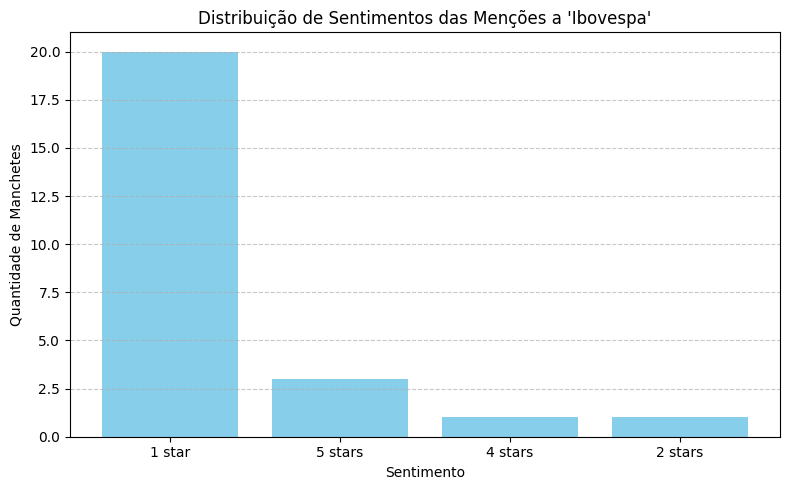

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar a frequência de cada sentimento
sentimentos = [resultado['label'] for resultado in resultados]
contagem_sentimentos = Counter(sentimentos)

# Preparar os dados para o gráfico
labels = contagem_sentimentos.keys()
valores = contagem_sentimentos.values()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color='skyblue')
plt.title("Distribuição de Sentimentos das Menções a 'Ibovespa'")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Manchetes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
